In [1]:
import numpy as np
import pandas as pd



In [2]:
df=pd.read_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/preprocessed_data.csv")


In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,credit_rating
0,19.0,9.215427,1.0,1,22.598761,2.0,17.0,372.0,5.0,2,7.962416,0,0,1,0,1,0,1,0,0,1,0,1,1
1,39.0,10.363441,3.0,2,15.569731,1.0,12.0,694.0,2.0,1,7.303170,0,1,0,1,0,0,0,0,0,0,0,1,3


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error


In [5]:
X = df.drop('Premium Amount',axis=1)
y = df['Premium Amount']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Feature Importance

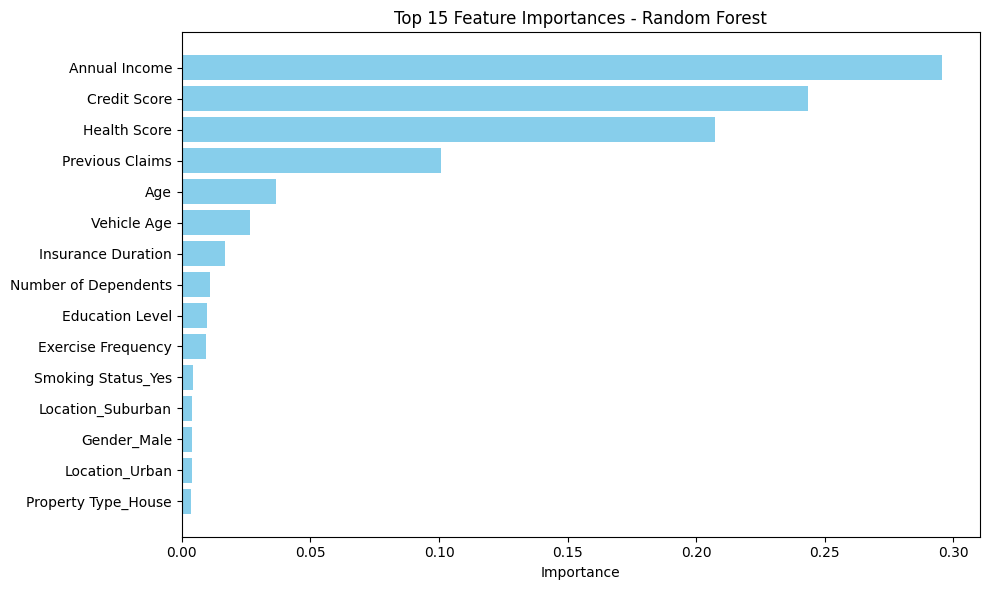

In [7]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Sample a smaller subset (optional but helps a lot)
X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Train a faster model
model = RandomForestRegressor(
    n_estimators=30,    # Fewer trees = faster
    max_depth=10,       # Limit depth to avoid overfitting and reduce time
    n_jobs=-1,          # Use all cores
    random_state=42
)
model.fit(X_sample, y_sample)

# Get and sort feature importances
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 15 only (optional for speed/clarity)
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [8]:
# 1. Define feature matrix and target vector
X = df[['Annual Income', 'Credit Score', 'Health Score', 'Previous Claims',
        'Age', 'Vehicle Age','Insurance Duration',
        'Number of Dependents',  'Education Level','Exercise Frequency']]

y = df['Premium Amount']

# 2. Combine features and target into one DataFrame
df1 = pd.concat([X, y], axis=1)

# 3. Display the result
df1


,Annual Income,Credit Score,Health Score,Previous Claims,Age,Vehicle Age,Insurance Duration,Number of Dependents,Education Level,Exercise Frequency,Premium Amount
0,9.215427,372.0,22.598761,2.0,19.0,17.0,5.0,1.0,1,2,7.962416
1,10.363441,694.0,15.569731,1.0,39.0,12.0,2.0,3.0,2,1,7.303170
2,10.150504,595.0,47.177549,1.0,23.0,14.0,3.0,3.0,0,2,6.343880
3,11.481156,367.0,10.938144,1.0,21.0,0.0,1.0,2.0,1,3,6.642487
4,10.587922,598.0,20.376094,0.0,21.0,8.0,4.0,1.0,1,2,7.612831
...,...,...,...,...,...,...,...,...,...,...,...
1199995,10.215301,372.0,13.772907,1.0,36.0,5.0,3.0,0.0,2,3,7.173958
1199996,10.485368,597.0,11.483482,1.0,54.0,10.0,4.0,2.0,2,2,6.712956
1199997,10.856804,595.0,14.724469,0.0,19.0,19.0,6.0,0.0,2,1,5.921578
1199998,10.109810,407.0,18.547381,1.0,55.0,7.0,4.0,1.0,3,3,6.393591


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

In [11]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models with their parameters
models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(max_depth=6, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=60, max_depth=6, min_samples_split=4, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=60, learning_rate=0.05, max_depth=6, objective='reg:squarederror', random_state=42)
}

mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set experiment name
mlflow.set_experiment("Regression Model Evaluation")

results_test = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    with mlflow.start_run(run_name=name):
        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred_test = model.predict(X_test)
        y_pred_test = np.maximum(y_pred_test, 0)

        # Evaluate
        rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        r2_test = r2_score(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)

        # Save metrics
        results_test[name] = {
            "RMSLE": rmsle_test,
            "RMSE": rmse_test,
            "R²": r2_test,
            "MAE": mae_test
        }

        # 🔸 Log parameters
        params = model.get_params()
        mlflow.log_params(params)

        # 🔸 Log metrics
        mlflow.log_metrics({
            "RMSLE": rmsle_test,
            "RMSE": rmse_test,
            "R2": r2_test,
            "MAE": mae_test
        })

        # 🔸 Log model
        input_example = X_test.iloc[:1] if hasattr(X_test, "iloc") else X_test[:1]
        signature = infer_signature(X_test, y_pred_test)

        if "XGB" in name:
            mlflow.xgboost.log_model(model, "model", signature=signature, input_example=input_example)
        else:
            mlflow.sklearn.log_model(model, "model", signature=signature, input_example=input_example)

# Optional: Display results
results_df = pd.DataFrame(results_test).T
print("\n📊 Evaluation Results:\n")
print(results_df)


2025/04/17 15:04:59 INFO mlflow.tracking.fluent: Experiment with name 'Regression Model Evaluation' does not exist. Creating a new experiment.



🔹 Training Linear Regression...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/166694248471690535/runs/22dd6bba490741afbdc957d7af84e98d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/166694248471690535

🔹 Training Decision Tree...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/166694248471690535/runs/4ae5fa0beb4a4edc9ce4196d2485eca7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/166694248471690535

🔹 Training Random Forest...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/166694248471690535/runs/499f208d2e474b1fb447e00bee524940
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/166694248471690535

🔹 Training XGBoost...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/sklearn.py:1028: UserWarning: [15:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving mod

🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/166694248471690535/runs/961a8713d58846e289d8f31b299c71e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/166694248471690535

📊 Evaluation Results:

                      RMSLE      RMSE        R²       MAE
Linear Regression  0.162876  1.078085  0.006458  0.788245
Decision Tree      0.158783  1.050295  0.057019  0.751676
Random Forest      0.158691  1.049579  0.058305  0.751017
XGBoost            0.158508  1.048274  0.060645  0.751073


In [12]:
# Display results
results_test_df = pd.DataFrame(results_test).T

print("\n📊 Testing Set Evaluation:")
print(results_test_df)


📊 Testing Set Evaluation:
                      RMSLE      RMSE        R²       MAE
Linear Regression  0.162876  1.078085  0.006458  0.788245
Decision Tree      0.158783  1.050295  0.057019  0.751676
Random Forest      0.158691  1.049579  0.058305  0.751017
XGBoost            0.158508  1.048274  0.060645  0.751073


In [13]:
# Identify best model based on RMSE
best_model_name = results_df["RMSE"].idxmin()
print(f"\n✅ Best performing model (lowest RMSE): {best_model_name}")


✅ Best performing model (lowest RMSE): XGBoost


Cross Validations

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(xgb, X, y, cv=kf, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.061845   0.06119345 0.05970877 0.06449261 0.06319734]

Mean R2 Score: 0.0621


Hyperparameter tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Sample 10% of the data for training
train_sample = df1.sample(frac=0.1, random_state=42)
X_train = train_sample.drop(columns=["Premium Amount"])
y_train = train_sample["Premium Amount"]

# Define XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'  # 'hist' is faster with large datasets
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# RandomizedSearchCV setup
grid_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model on training data
grid_search.fit(X_train, y_train)

# Best model
best_xgb_model = grid_search.best_estimator_
y_pred_train = best_xgb_model.predict(X_train)

# Evaluation metrics
rmsle = np.sqrt(mean_squared_log_error(y_train, np.maximum(y_pred_train, 0)))  # Ensure no negative predictions
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)

# Display results
print("Best Hyperparameters:", grid_search.best_params_)
print(f"RMSLE: {rmsle:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
RMSLE: 0.1569
MAE: 0.7439
RMSE: 1.0368
R²: 0.0797


In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Step 1: Define features and target ---
X = df1.drop(columns=["Premium Amount"])   # Replace with your actual target column
y = df1["Premium Amount"]

# --- Step 2: Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Step 4: Train final model with best hyperparameters ---
final_model = XGBRegressor(
    subsample=1.0,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

final_model.fit(X_train, y_train)

# --- Step 5: Evaluate model on test set ---
y_pred = final_model.predict(X_test)

rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred, 0)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Evaluation Metrics:")
report = {
print(f"RMSLE: {rmsle:.4f}"),
print(f"MAE:   {mae:.4f}"),
print(f"RMSE:  {rmse:.4f}"),
print(f"R²:    {r2:.4f}") 
}


print(report)


Final Model Evaluation Metrics:
RMSLE: 0.1583
MAE:   0.7503
RMSE:  1.0472
R²:    0.0618
{None}


In [17]:
import pickle

# Save the model
with open("/Users/somesh-19583/Desktop/Insurance_amount_prediction/Pickled Data/xgb_model.pkl", "wb") as model_file:
    pickle.dump(final_model, model_file)

# Save the scaler
with open("/Users/somesh-19583/Desktop/Insurance_amount_prediction/Pickled Data/scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [18]:


y_pred_actual = np.expm1(y_pred)  # Inverse of log1p

# Inverse log-transform of true y_test values for accurate evaluation
y_test_actual = np.expm1(y_test)


In [19]:
y_pred_actual

array([ 833.23474, 1003.2185 ,  816.34235, ...,  803.6177 ,  712.3683 ,
        856.37286], shape=(240000,), dtype=float32)

In [20]:
y_test_actual

372605     2743.0
551204     1348.0
240320     2197.0
1047361     685.0
555362     1715.0
            ...  
458271     1287.0
1124744      25.0
720454      972.0
256458      563.0
423212     1485.0
Name: Premium Amount, Length: 240000, dtype: float64